In [1]:
import pandas
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plot
plot.style.use('ggplot')
%matplotlib inline

In [2]:
iris_d = datasets.load_iris()

In [3]:
iris_d.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris_d['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_df_dat = pandas.DataFrame(iris_d['data'], columns=iris_d['feature_names'])

In [6]:
iris_df_dat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_df_tg = pandas.DataFrame(iris_d['target'],columns=['species'])

In [8]:
iris_dat = pandas.concat([iris_df_dat,iris_df_tg],axis=1)

In [9]:
iris_d['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0, 0.5, 'Sepal Length')

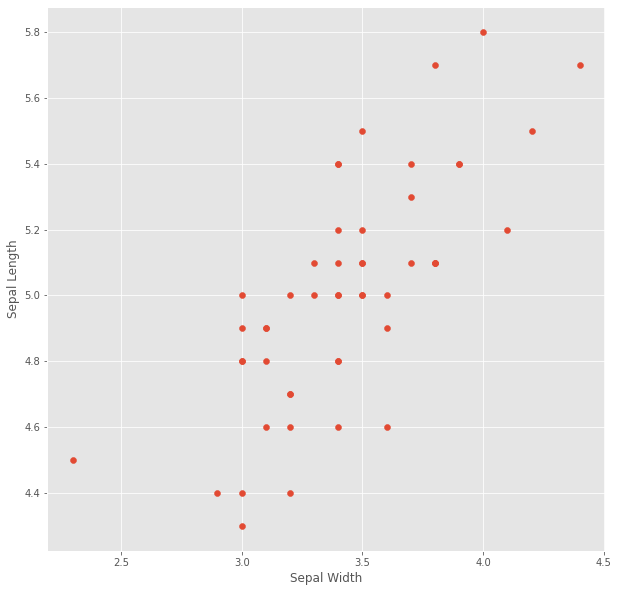

In [11]:
fig,ax = plot.subplots(figsize=(10,10))
ax.scatter(iris_dat['sepal width (cm)'][:50],iris_dat['sepal length (cm)'][:50])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Sepal Length')

In [12]:
import statsmodels.api as stats_api

In [13]:
wid = iris_dat['sepal width (cm)'][:50]
len = iris_dat['sepal length (cm)'][:50]

In [23]:
widX = stats_api.add_constant(wid)
res = stats_api.OLS(len,widX).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      sepal length (cm)   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           6.71e-10
Time:                        14:27:00   Log-Likelihood:                 1.7341
No. Observations:                  50   AIC:                            0.5319
Df Residuals:                      48   BIC:                             4.356
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6390      0.310  

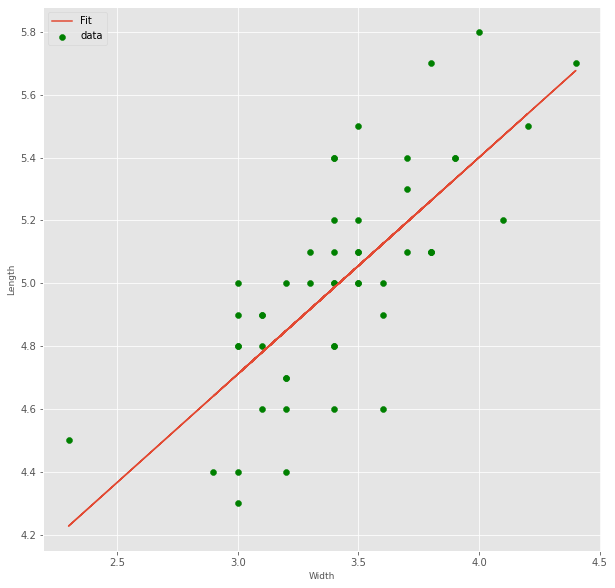

In [27]:
fig,ax = plot.subplots(figsize=(10,10))
ax.plot(wid,res.fittedvalues,label='Fit')
ax.scatter(wid,len,label='data',color='green')
ax.set_xlabel('Width',fontsize=9)
ax.set_ylabel('Length',fontsize=9)
ax.legend(loc=2)